In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('headbrain.csv')

In [3]:
df.head()

,Gender,AgeRange,HeadSize,BrainWeight
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [4]:
df.shape

(237, 4)

In [5]:
df.dtypes

Gender         int64
AgeRange       int64
HeadSize       int64
BrainWeight    int64
dtype: object

In [6]:
df.info

<bound method DataFrame.info of      Gender  AgeRange  HeadSize  BrainWeight
0         1         1      4512         1530
1         1         1      3738         1297
2         1         1      4261         1335
3         1         1      3777         1282
4         1         1      4177         1590
..      ...       ...       ...          ...
232       2         2      3214         1110
233       2         2      3394         1215
234       2         2      3233         1104
235       2         2      3352         1170
236       2         2      3391         1120

[237 rows x 4 columns]>

In [7]:
df.describe()

,Gender,AgeRange,HeadSize,BrainWeight
count,237.000000,237.000000,237.000000,237.000000
mean,1.434599,1.535865,3633.991561,1282.873418
std,0.496753,0.499768,365.261422,120.340446
min,1.000000,1.000000,2720.000000,955.000000
25%,1.000000,1.000000,3389.000000,1207.000000
50%,1.000000,2.000000,3614.000000,1280.000000
75%,2.000000,2.000000,3876.000000,1350.000000
max,2.000000,2.000000,4747.000000,1635.000000


In [8]:
df.isnull().sum()

Gender         0
AgeRange       0
HeadSize       0
BrainWeight    0
dtype: int64

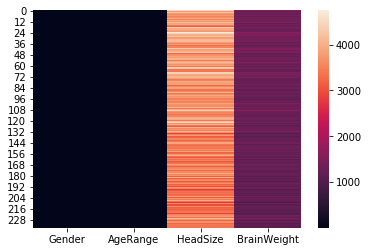

In [9]:
sns.heatmap(df)

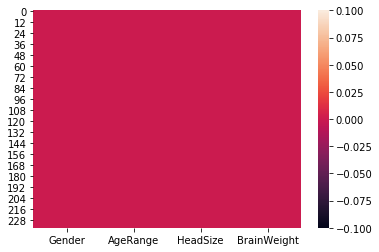

In [10]:
sns.heatmap(df.isnull())

In [11]:
dfcor=df.corr()
dfcor

,Gender,AgeRange,HeadSize,BrainWeight
Gender,1.000000,-0.088652,-0.514050,-0.465266
AgeRange,-0.088652,1.000000,-0.105428,-0.169438
HeadSize,-0.514050,-0.105428,1.000000,0.799570
BrainWeight,-0.465266,-0.169438,0.799570,1.000000


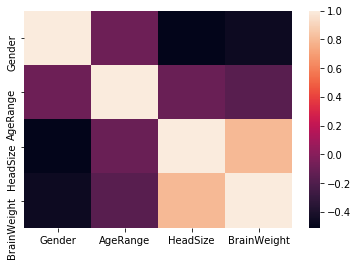

In [12]:
sns.heatmap(dfcor)

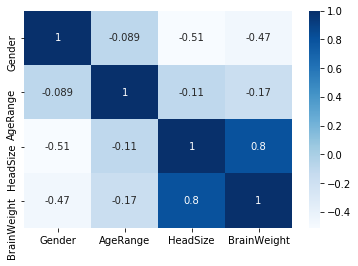

In [13]:
plt.figure(figsize=(6,4))
sns.heatmap(dfcor,cmap='Blues',annot=True)

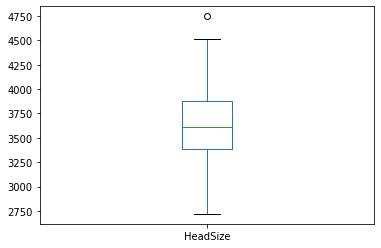

In [14]:
#checking for outliners
df['HeadSize'].plot.box()

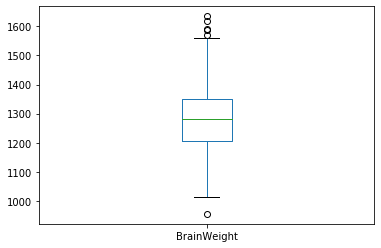

In [15]:
df['BrainWeight'].plot.box()

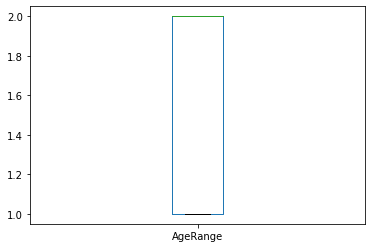

In [16]:
df['AgeRange'].plot.box()

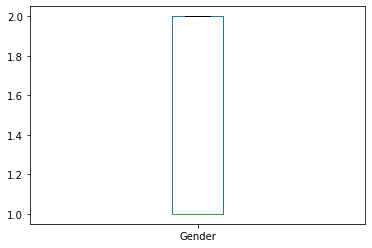

In [17]:
df['Gender'].plot.box()

In [18]:
collist=df.columns.values
ncol=4
nrows=1

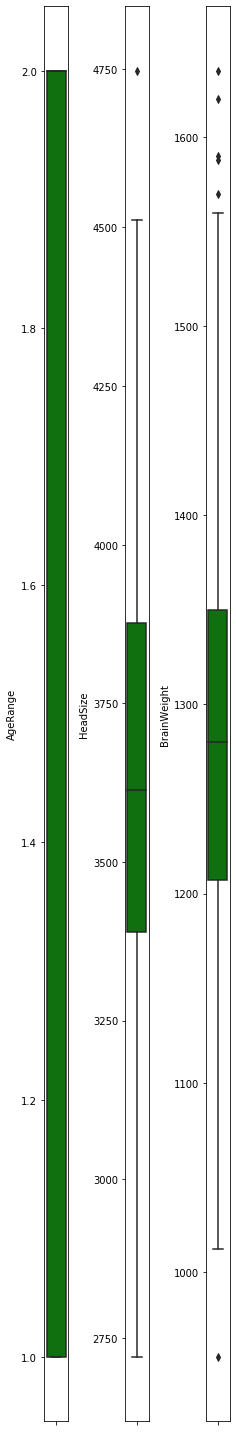

In [19]:
plt.figure(figsize=(ncol,5*ncol))
for i in range(1, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

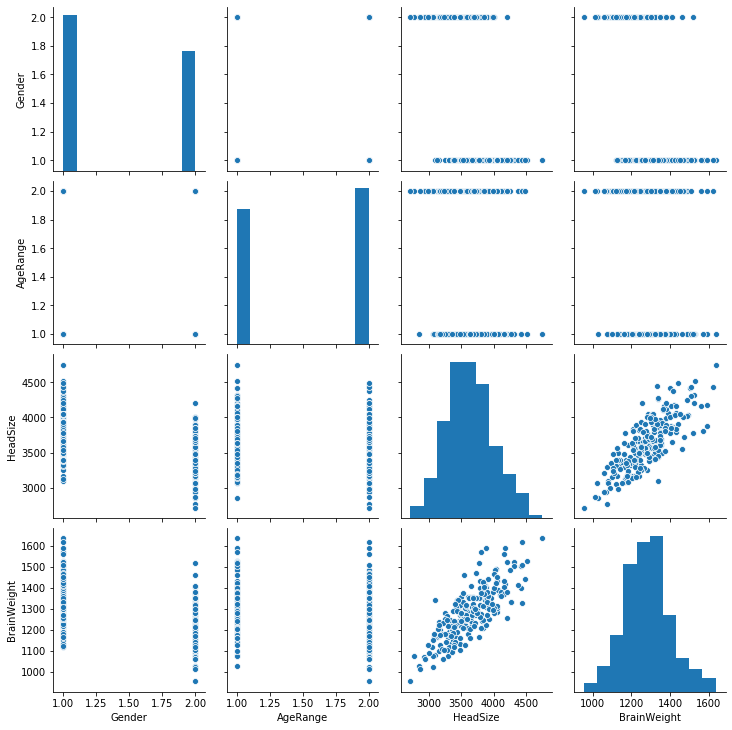

In [20]:
sns.pairplot(df)

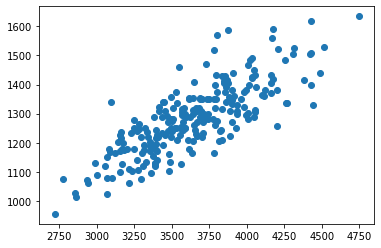

In [21]:
plt.scatter(df['HeadSize'],df['BrainWeight'])
plt.show()

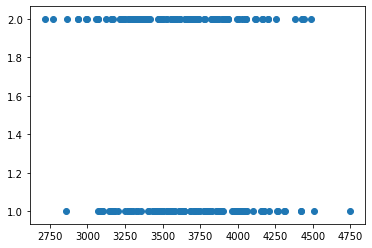

In [22]:
plt.scatter(df['HeadSize'],df['AgeRange'])
plt.show()

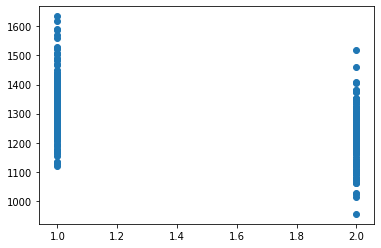

In [23]:
plt.scatter(df['Gender'],df['BrainWeight'])
plt.show()

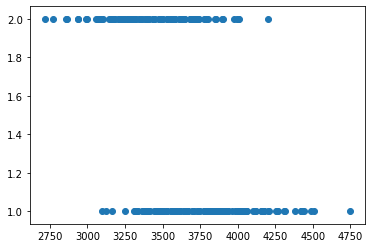

In [24]:
plt.scatter(df['HeadSize'],df['Gender'])
plt.show()

In [25]:
#removing outliners
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.8767307 , 1.07449777, 2.40886829, 2.0579083 ],
       [0.8767307 , 1.07449777, 0.28535333, 0.11763692],
       [0.8767307 , 1.07449777, 1.72023489, 0.43407603],
       [0.8767307 , 1.07449777, 0.39235214, 0.00727325],
       [0.8767307 , 1.07449777, 1.4897759 , 2.557549  ],
       [0.8767307 , 1.07449777, 0.13441126, 0.14261896],
       [0.8767307 , 1.07449777, 0.41430062, 0.97535345],
       [0.8767307 , 1.07449777, 0.2057438 , 0.23211156],
       [0.8767307 , 1.07449777, 0.05759159, 0.60062293],
       [0.8767307 , 1.07449777, 0.95478182, 0.76716983],
       [0.8767307 , 1.07449777, 0.52399669, 0.47571276],
       [0.8767307 , 1.07449777, 0.98496097, 0.80880656],
       [0.8767307 , 1.07449777, 0.01648451, 0.60062293],
       [0.8767307 , 1.07449777, 1.57482624, 1.99128954],
       [0.8767307 , 1.07449777, 0.54324791, 0.62349678],
       [0.8767307 , 1.07449777, 0.66396452, 1.01699018],
       [0.8767307 , 1.07449777, 0.37584448, 0.62560497],
       [0.8767307 , 1.07449777,

In [26]:
threshold=3
print(np.where(z>3))

(array([24], dtype=int64), array([2], dtype=int64))


In [27]:
df_new=df[(z<3).all(axis=1)]

In [28]:
df_new

,Gender,AgeRange,HeadSize,BrainWeight
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
...,...,...,...,...
232,2,2,3214,1110
233,2,2,3394,1215
234,2,2,3233,1104
235,2,2,3352,1170


In [29]:
df.shape

(237, 4)

In [30]:
df_new.shape

(236, 4)

In [31]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df)
x=pd.DataFrame(x,columns=df.columns)

In [32]:
import sklearn
from sklearn.linear_model import LinearRegression

In [33]:
x=df.iloc[:,0:-1]
x.head()

,Gender,AgeRange,HeadSize
0,1,1,4512
1,1,1,3738
2,1,1,4261
3,1,1,3777
4,1,1,4177


In [34]:
y=df.iloc[:,-1]
y.head()

0    1530
1    1297
2    1335
3    1282
4    1590
Name: BrainWeight, dtype: int64

In [35]:
x.shape

(237, 3)

In [36]:
y.shape

(237,)

In [37]:
y=y.values.reshape(-1,1)

In [38]:
y.shape

(237, 1)

In [39]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=76)

In [41]:
x_train.shape

(184, 3)

In [42]:
x_test.shape

(53, 3)

In [43]:
y_train.shape

(184, 1)

In [44]:
y_test.shape

(53, 1)

In [45]:
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
lm = LinearRegression()
def maxr2_score(lm,x,y):
    max_r_score=0
    for r_state in range(42,101):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.24)
        lm=LinearRegression()
        lm.fit(x_train,y_train)
        y_pred=lm.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print('r2_score corresponding to random state; ',r_state,' is: ',r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state

    print('max r2 score corresponding to ',final_r_state,' is ',max_r_score)
maxr2_score(lm, x,y)

r2_score corresponding to random state;  42  is:  0.6809441066460726
r2_score corresponding to random state;  43  is:  0.6404195591901389
r2_score corresponding to random state;  44  is:  0.6246549625301627
r2_score corresponding to random state;  45  is:  0.7194701305363861
r2_score corresponding to random state;  46  is:  0.5946658580835338
r2_score corresponding to random state;  47  is:  0.6448290932852199
r2_score corresponding to random state;  48  is:  0.7074308019363215
r2_score corresponding to random state;  49  is:  0.5794812870075317
r2_score corresponding to random state;  50  is:  0.773664600742354
r2_score corresponding to random state;  51  is:  0.6474734180416784
r2_score corresponding to random state;  52  is:  0.6639384752613484
r2_score corresponding to random state;  53  is:  0.6512378358497151
r2_score corresponding to random state;  54  is:  0.625040147613235
r2_score corresponding to random state;  55  is:  0.6607978842164157
r2_score corresponding to random sta

In [46]:
from sklearn.model_selection import cross_val_score
a_score=cross_val_score(linear_model.LinearRegression(),x,y,cv=5,scoring="r2")
a_score.mean()# checking underfitting/overfitting, a moderate score of 51% means the model can be improved upon.

0.5055914843895712

In [47]:
from sklearn.linear_model import Lasso, Ridge

In [48]:
ls=Lasso(alpha=0.01)
#ls=lasso(alpha=1.0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.6454239232987263

In [49]:
rd=Ridge(alpha=0.01)
#rd=Ridge()
rd.fit(x_train,y_train)
rd.score(x_train,y_train)

0.6454240002262213

In [50]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100,random_state=50)
rf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=50, verbose=0, warm_start=False)

In [51]:
rf.score(x_test,y_test)

0.4736715475453854

In [52]:
pred=rf.predict(x_test)
pred# model prediction

array([1349.64      , 1441.98      , 1393.5       , 1055.45      ,
       1253.59      , 1340.02      , 1301.91      , 1271.3       ,
       1284.95      , 1237.86      , 1320.65      , 1181.72      ,
       1184.57      , 1362.87      , 1186.39      , 1319.15      ,
       1416.63166667, 1318.93      , 1370.59      , 1429.54      ,
       1402.7       , 1251.6       , 1132.38      , 1456.7       ,
       1173.63      , 1314.23      , 1175.25      , 1200.18066667,
       1384.52      , 1429.54      , 1314.13      , 1430.08333333,
       1284.95      , 1178.8       , 1224.52033333, 1307.69      ,
       1178.6       , 1329.54      , 1176.61      , 1322.48      ,
       1282.33      , 1235.55      , 1194.29      , 1381.56      ,
       1296.88      , 1269.18      , 1138.44      , 1475.16      ,
       1130.4       , 1146.8       , 1412.05      , 1298.25      ,
       1454.65666667])

In [53]:
from sklearn.ensemble import AdaBoostRegressor
model=AdaBoostRegressor()
model.fit(x_train,y_train)
print(model.score(x_train,y_train))
abpred=model.predict(x_test)
print(abpred)
model.score(x_test,y_test)

0.6773317402780297
[1391.95       1390.68421053 1391.95       1053.45454545 1284.475
 1382.32758621 1274.33333333 1279.97435897 1284.475      1199.02702703
 1284.475      1185.36666667 1189.0212766  1391.95       1175.7173913
 1308.13157895 1425.9787234  1290.25       1391.95       1391.95
 1391.95       1357.22222222 1175.7173913  1425.80769231 1175.7173913
 1284.475      1175.7173913  1189.0212766  1391.95       1391.95
 1284.475      1425.9787234  1284.475      1238.18604651 1199.02702703
 1357.22222222 1175.7173913  1390.68421053 1175.7173913  1390.68421053
 1274.33333333 1243.66666667 1185.36666667 1391.95       1284.475
 1284.475      1139.37931034 1382.32758621 1175.7173913  1189.0212766
 1391.95       1290.25       1425.80769231]


0.5503572812916288

In [54]:
from sklearn.ensemble import GradientBoostingRegressor
model=GradientBoostingRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.476829070927482

In [62]:
#final model to be used for the brainweight prediction will be the RainForestRegressor since it gives the maximum r2_score of 77% at a random state of 50
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=50,test_size=0.20)
lm=linear_model.LinearRegression()
lm.fit(x_train,y_train)
y_pred=lm.predict(x_test)

In [63]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print('RMSE is: ',np.sqrt(mean_squared_error(y_test,y_pred)))
print('r2_score: ',r2_score(y_test,y_pred))

RMSE is:  57.89046127064093
r2_score:  0.7869409544679555


In [64]:
#saving the model
from sklearn.externals import joblib
filename='lmbrain_weightfile.obj'

In [65]:
joblib.dump(lm,'lmbrain_weightfile.obj')

['lmbrain_weightfile.obj']

In [59]:
# Conclusion: Dataset had no missing values but was cleaned from outliers and skewness. Visualization indicated that the headsize attribute was strongly related to the output brainweight.
    The Linear Regression model was suitable for this analysis because it had an R2 score of 78%. the model was further cross validated to check for underfitting and overfitting, then saved using joblib for future production.